In [134]:
import agents
import game
import mechanisms

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch

In [135]:
import importlib
importlib.reload(agents)
importlib.reload(game)
importlib.reload(mechanisms)

<module 'mechanisms' from 'C:\\Users\\billz\\PycharmProjects\\CS_281\\Finding_Friends\\mechanisms.py'>

In [136]:
NUM_PLAYERS = 5
BASE_LVL = 0
LVL_CAP = 100
WIN_PROB = 1.0

skill_levels = np.random.randint(1, 5, size=NUM_PLAYERS)
skill_levels = skill_levels / np.sum(skill_levels)
print(skill_levels)

ff_agents = [agents.Basic_Agent(i, BASE_LVL) for i in range(NUM_PLAYERS - 1)]
# ff_agents.append(agents.Lowest_Level_Agent(NUM_PLAYERS - 3, BASE_LVL))
# ff_agents.append(agents.Lowest_Level_Agent(NUM_PLAYERS - 2, BASE_LVL))
ff_agents.append(agents.Beta_Binomial_Agent(NUM_PLAYERS - 1, BASE_LVL, skill=skill_levels[NUM_PLAYERS - 1], priors=(2, 3)))

# ff_mech = mechanisms.Baseline_Mechanism(num_players=NUM_PLAYERS, p=WIN_PROB)
ff_mech = mechanisms.Skill_Mechanism(num_players=NUM_PLAYERS, skill_levels=skill_levels)

ff_game = game.Game(players=ff_agents, mechanism=ff_mech, cap=LVL_CAP, logging_level='DEBUG')

[0.18181818 0.36363636 0.27272727 0.09090909 0.09090909]


In [137]:
NUM_TRIALS = 1000
results = []

for i in range(NUM_TRIALS):
    ff_game.play()
    results.append(ff_game.levels)
    ff_game.reset()

results = np.array(results)

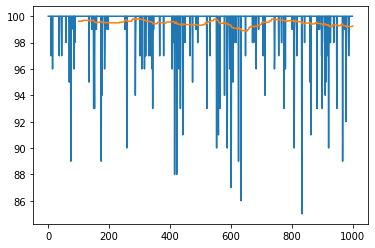

In [138]:
plt.plot(results[:, 1])
means = torch.tensor(results[:, 1], dtype=torch.float).unfold(0, 100, 1).mean(1).view(-1)
# means = torch.cat((torch.zeros(99), means))
plt.plot(np.arange(100, 100 + len(means)), means.numpy())
plt.show()

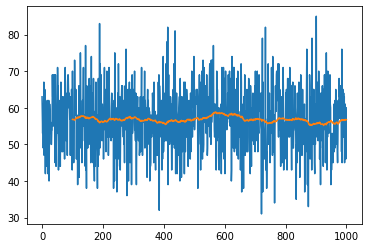

In [139]:
plt.plot(results[:, -1])
means = torch.tensor(results[:, -1], dtype=torch.float).unfold(0, 100, 1).mean(1).view(-1)
# means = torch.cat((torch.zeros(99), means))
plt.plot(np.arange(100, 100 + len(means)), means.numpy())
plt.show()

In [140]:
np.sum([results[i][-1] == 100 for i in range(len(results))]) / NUM_TRIALS

0.0

In [141]:
ff_agents[-1].skill

0.09090909090909091

In [142]:
final_probs = ff_agents[-1].map_probs(NUM_PLAYERS)
final_probs

array([0.30594   , 0.46297272, 0.39430953, 0.20596822, 0.        ])

In [143]:
final_probs * (1 - ff_agents[-1].skill) / np.sum(final_probs)

array([0.20313264, 0.30739645, 0.26180668, 0.13675514, 0.        ])